In [16]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy import sparse
import seaborn as sns

In [11]:
X = sparse.load_npz('data-cleaned/recipes_tfidf.npz')
X.shape

svdhat = TruncatedSVD(n_components=200)
Xhat = svdhat.fit_transform(X)

In [12]:
X = sparse.load_npz('data-cleaned/recipes.npz')
X.shape

svd = TruncatedSVD(n_components=200)
Xhat = svd.fit_transform(X)

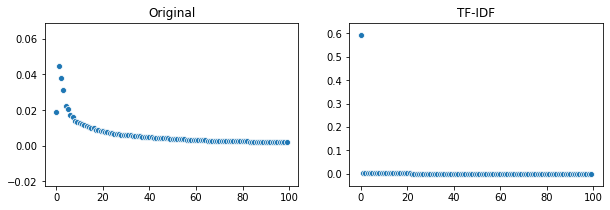

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

sns.scatterplot(np.arange(100), svd.explained_variance_ratio_[:100], ax=ax[0])
ax[0].set_title("Original")

sns.scatterplot(np.arange(100), svdhat.explained_variance_ratio_[:100], ax=ax[1])
ax[1].set_title("TF-IDF")

plt.savefig("figs/pca.pdf", bbox_inches="tight")
plt.show()